In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [16]:
x = df['type'].str.contains('Movie').sum(),df['type'].str.contains('TV Show').sum()
print(x)

(6126, 2664)


Text(0.5, 1.0, 'Content Share')

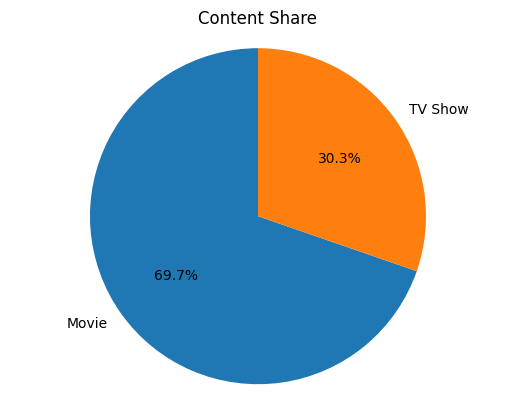

In [20]:
content = df.items()
plt.pie(x,labels=('Movie','TV Show'),autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Content Share')


C:\Users\M.COmputer\AppData\Local\Temp\ipykernel_9240\3156396810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_content_count.head(10).values, y=country_content_count.head(10).index, palette='Set3')


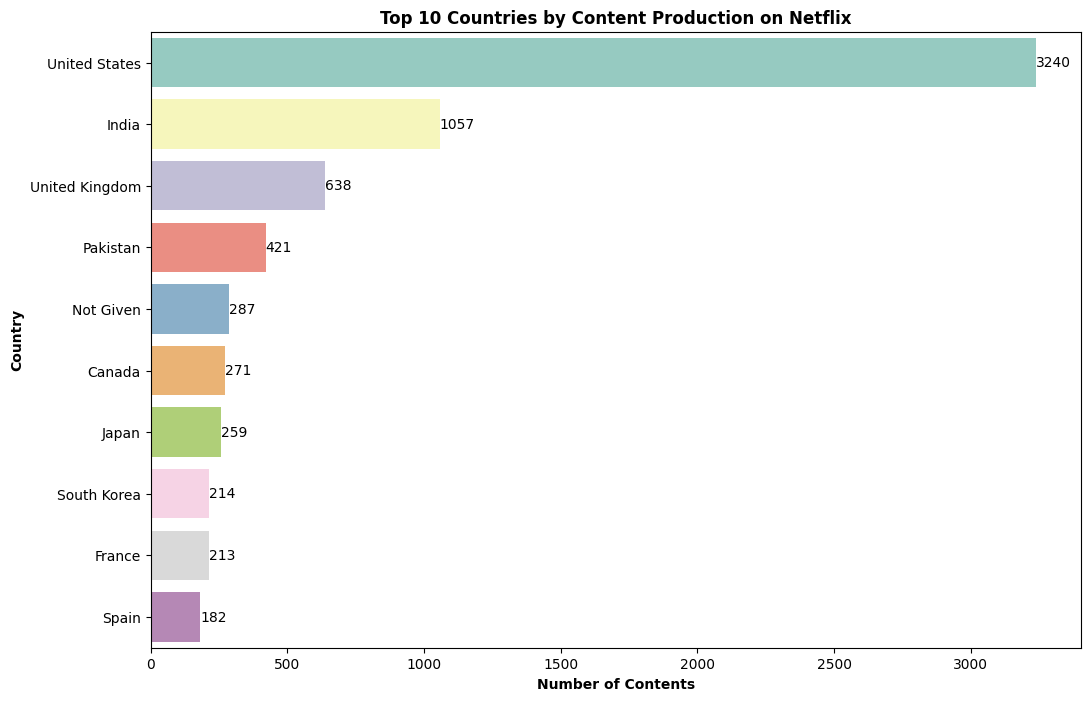

In [30]:
# Calculate the number of contents produced by each country
country_content_count = df['country'].value_counts()

# Display the top 10 countries with the most content production
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=country_content_count.head(10).values, y=country_content_count.head(10).index, palette='Set3')
plt.title('Top 10 Countries by Content Production on Netflix',fontweight= 'bold')
plt.xlabel('Number of Contents',fontweight= 'bold')
plt.ylabel('Country',fontweight='bold')
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
date = pd.to_datetime(df['date_added'],format='%m/%d/%Y')
date['Year'] = date.dt.year

Content_added = date['Year'].value_counts().sort_index()
print(Content_added)

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


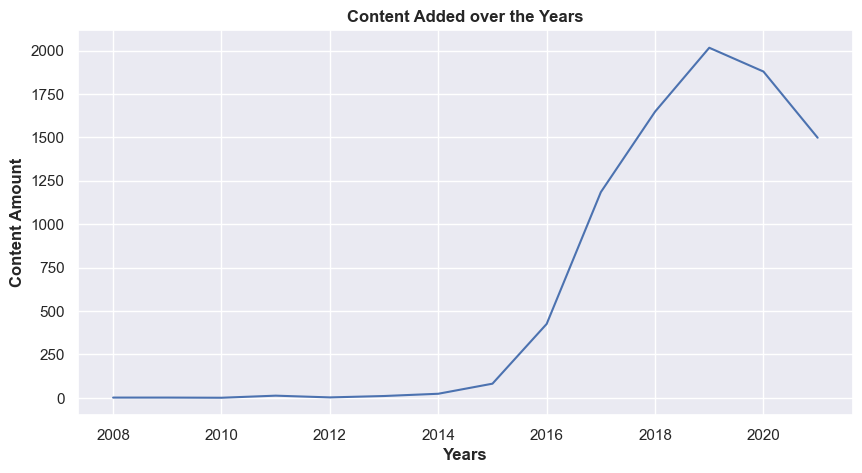

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x=Content_added.index,y=Content_added.values,markers='o')
plt.title('Content Added over the Years',fontweight= 'bold')
plt.xlabel('Years',fontweight= 'bold')
plt.ylabel('Content Amount',fontweight= 'bold')
plt.grid(True)

C:\Users\M.COmputer\AppData\Local\Temp\ipykernel_4344\1386692506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count.index,y=rating_count.values,palette= 'magma')


Text(0, 0.5, 'Distribution')

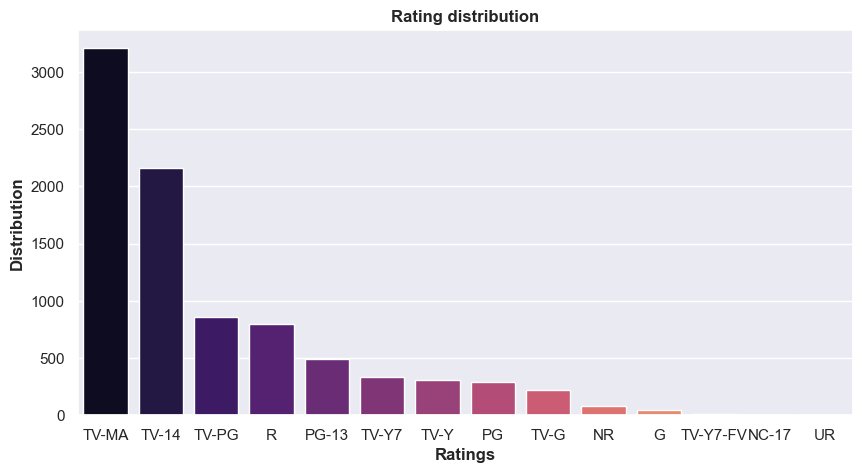

In [18]:
rating_count = df['rating'].value_counts()
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=rating_count.index,y=rating_count.values,palette= 'magma')
plt.title('Rating distribution',fontweight= 'bold')
plt.xlabel('Ratings',fontweight= 'bold')
plt.ylabel('Distribution',fontweight= 'bold')

C:\Users\M.COmputer\AppData\Local\Temp\ipykernel_10348\1071392991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors_count.index,y= directors_count.values,palette='viridis')


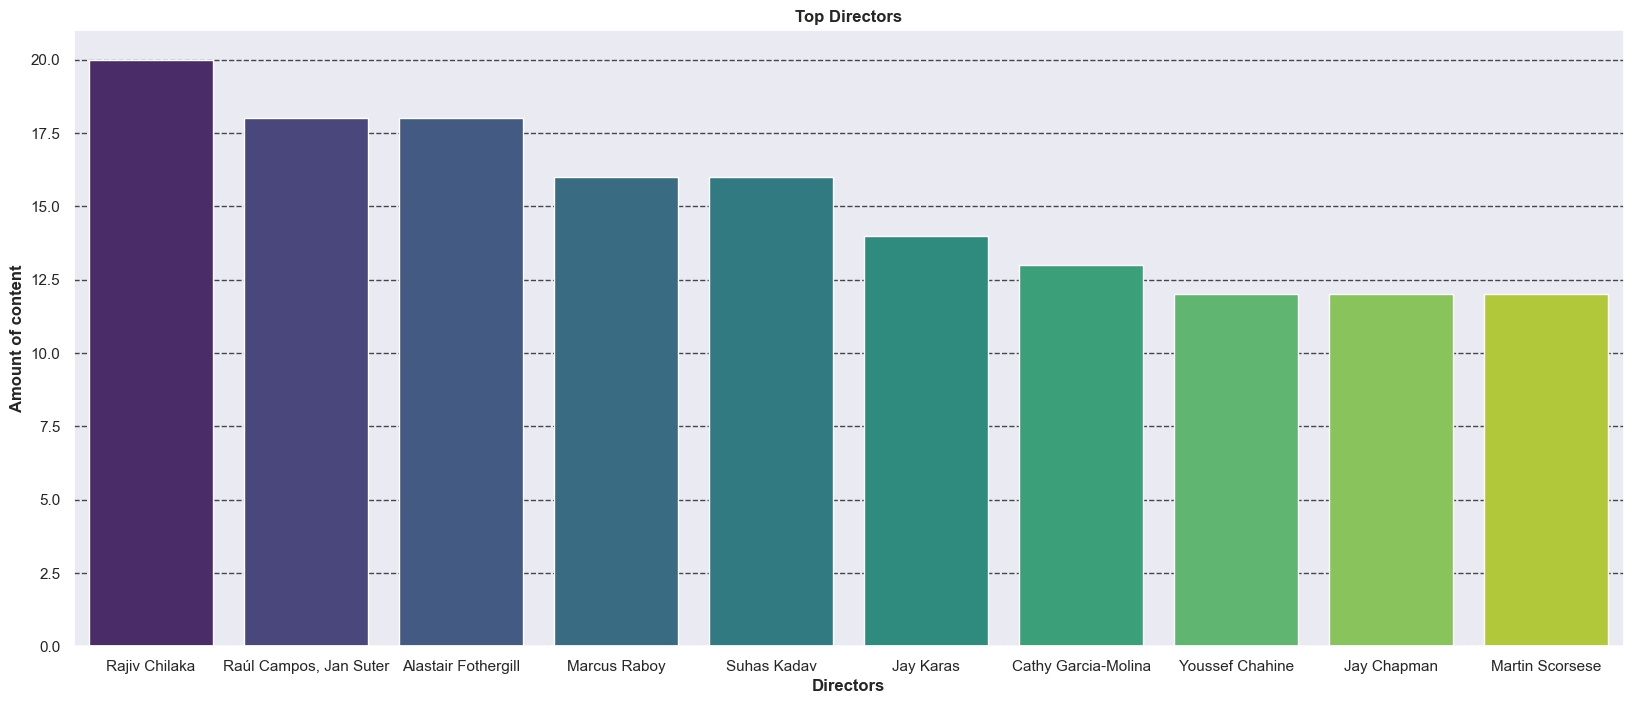

In [21]:
df_final = df[df['director']!= 'Not Given']
directors_count = df_final['director'].value_counts().head(10)
sns.set({'figure.figsize':(20,8)})
sns.barplot(x=directors_count.index,y= directors_count.values,palette='viridis')
plt.title('Top Directors',fontweight='bold')
plt.xlabel('Directors',fontweight='bold')
plt.ylabel('Amount of content',fontweight='bold')
plt.grid(axis= 'y' ,linestyle= '--',alpha = 0.7,color = 'black')